# **Lagrange Polynomial Calculator**

## **Contents**
- [Introduction](#Introduction)
- [The Lagrange Polynomial](#The-Lagrange-Polynomial)
- [Python Implementation](#Python-Implementation)
- [Credits](#Credits)


## **Introduction**
The purpose of this project is to calculate the Lagrange polynomial interpolating a set of points in the Cartesian plane. The `time`, `numpy`, `matplotlib`, `seaborn`, and `warnings` libraries will be used. Moreover, the plot styles are changed for aesthetic reasons.

In [49]:
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wrn
sns.set_style(style = "whitegrid", rc = {"font.family" : "Times New Roman", "font.weight" : "bold"})
wrn.simplefilter(action = "ignore")

## **The Lagrange Basis**
Let $n$ be a non-zero natural number in $\mathbb{N}$, let $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$ be Euclidean vectors given by $\mathbf{\vec{x}} = \left(x_{k}\right)_{k = 1}^{n}$ and $\mathbf{\vec{y}} = \left(y_{k}\right)_{k = 1}^{n}$, for given $n$-tuples $\left(x_{k}\right)_{k = 1}^{n}$ and $\left(y_{k}\right)_{k = 1}^{n}$ in $\mathbb{R}^n$, such that:
$$\forall (j, k) \in [[1, n]]^2, \enspace j \neq k \implies x_{j} \neq x_{k}$$
That is, all components of the Euclidean vector $\mathbf{\vec{x}}$ are distinct.
- The *Lagrange basis for $\mathbf{\vec{x}}$ for polynomials of degree at most $n-1$* is the $n$-tuple of functions in $\mathscr{F}\left(\mathbb{R}, \mathbb{R}\right)^{n}$ denoted by $\left(\ell_{k, \mathbf{\vec{x}}}\right)_{k=1}^{n}$ and defined, for every natural number $k$ in $[[1,n]]$, by:
$$\begin{array}{c|ccc}
\ell_{k, \mathbf{\vec{x}}}\colon   &   \mathbb{R}  &   \longrightarrow &   \mathbb{R}  \\
                                    &   x           &   \longmapsto     &   \displaystyle\prod_{\substack{j = 1 \\ j \neq k}}^{n}\dfrac{x-x_{j}}{x_{k}-x_{j}}
\end{array}$$
- The *Lagrange polynomial for $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$* is the function denoted by $\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}$ and defined by:
$$\begin{array}{c|ccc}
\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}\colon   &   \mathbb{R}  &   \longrightarrow &   \mathbb{R}  \\
                                    &   x           &   \longmapsto     &   \displaystyle\sum_{k=1}^{n}y_{k}\ell_{k, \mathbf{\vec{x}}}(x)
\end{array}$$
Several remarks are in order:
- The Lagrange polynomial $\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}$ is uniquely determined by $\mathbf{\vec{x}}$ and $\mathbf{\vec{y}}$, provided that all of the components of the Euclidean vector $\mathbf{\vec{x}}$ are distinct.
- One has:
$$\forall k \in [[1,n]], \enspace \mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}\left(x_{k}\right) = y_{k}$$
- The components of the Euclidean vector $\mathbf{\vec{x}}$ are commonly called *nodes* and the components of the Euclidean vector $\mathbf{\vec{y}}$ are commonly called *values*.

## **Python Implementation**
The Python implementation for computing the Lagrange basis and the Lagrange polynomial is given in the code cell below.

In [50]:
def lagrange_basis_polynomial(nodes, k):
    """
    Computes a Lagrange basis polynomial for a set of nodes at the specified ordinal number (using 1-based indexing)

    Parameters
    ----------
    nodes : array-like
        Either a list or a numpy array object containing all of the nodes
    k : int
        An integer indicating the 1-based index of the polynomial of the Lagrange basis for the nodes to be computed
    
    Returns
    -------
    function
        A function equal to the Lagrange basis polynomial for the nodes at the specified 1-based index
    """
    assert (isinstance(nodes, list) or isinstance(nodes, np.ndarray)) and (len(nodes) == len(set(nodes)))
    N_nodes = len(nodes)
    assert k in range(1, N_nodes + 1)
    X = np.array(nodes)
    x_k = X[k - 1]
    return lambda x : np.prod([(x - X[j - 1]) / (x_k - X[j - 1]) for j in range(1, N_nodes + 1) if j != k])

Here is an example evaluating $\ell_{1, \mathbf{\vec{x}}}$, where $\mathbf{\vec{x}} = (1, 2, 3, 4)$, on the interval $[0, 10]$:

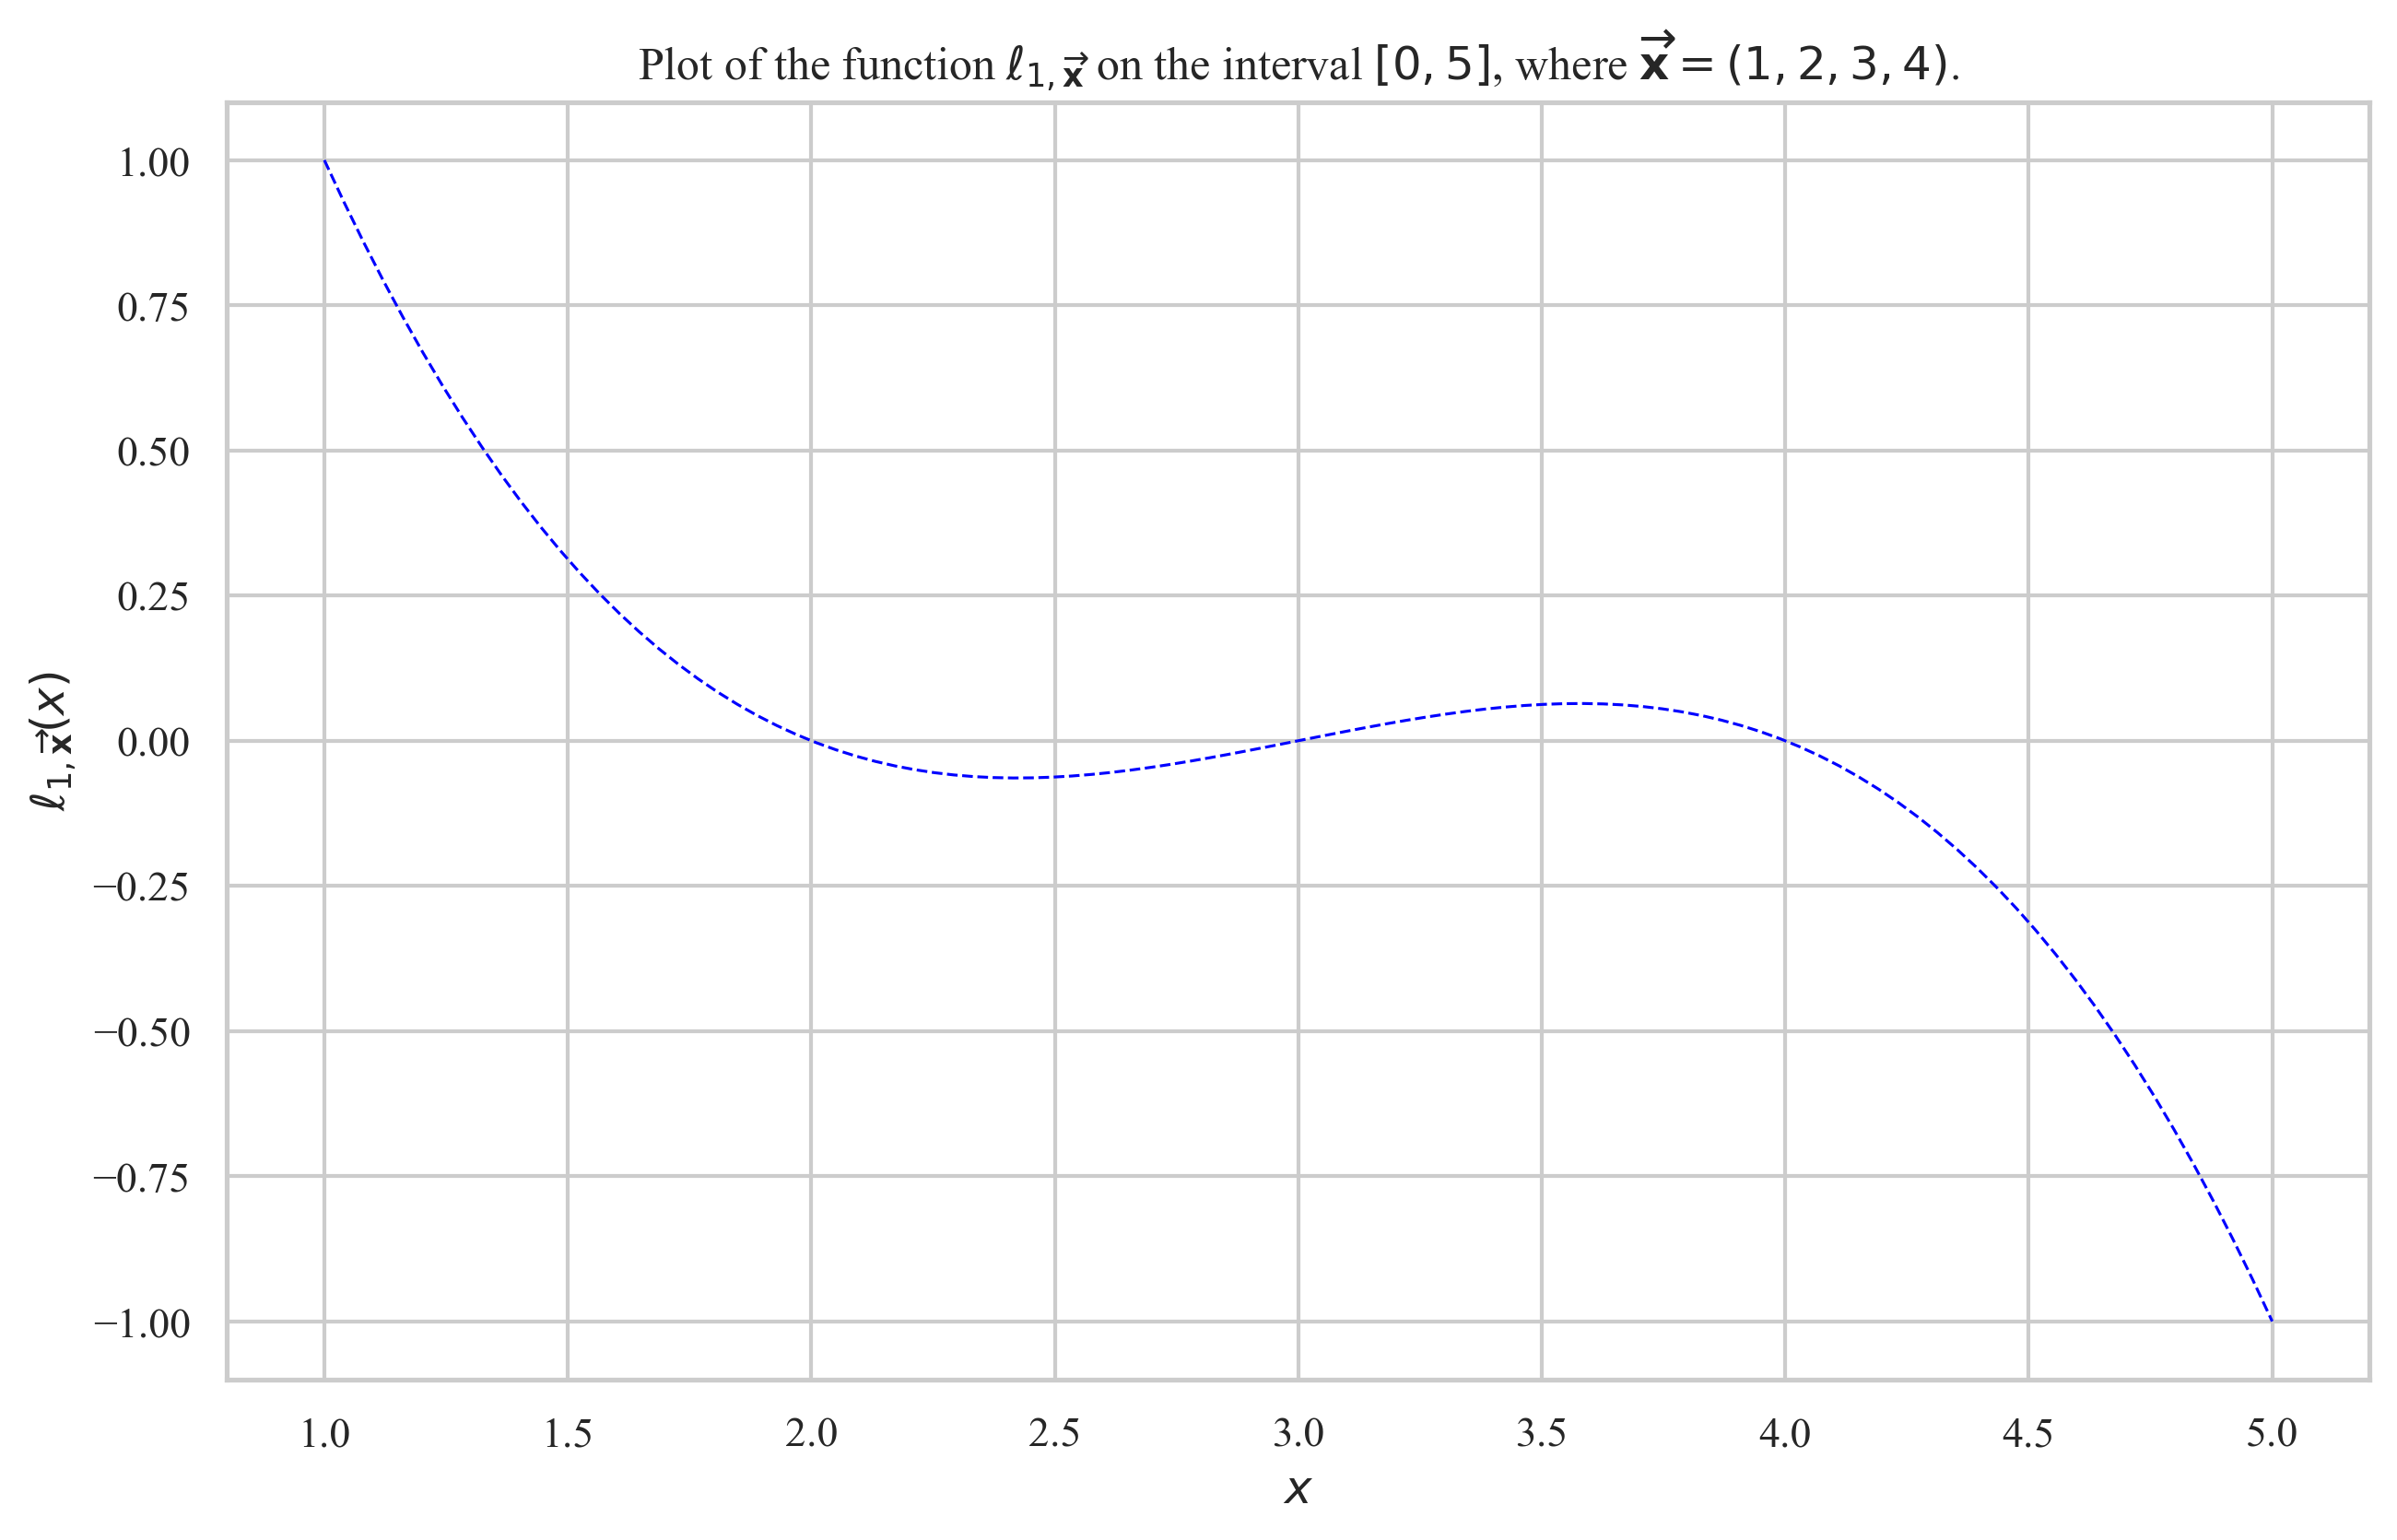

In [51]:
l = np.vectorize(lagrange_basis_polynomial(np.array([1, 2, 3, 4]), 1))
x = np.linspace(1, 5, 100)
y = l(x)
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
sns.lineplot(x = x, y = y, color = "blue", linewidth = 0.75, linestyle = "--").set(title = "Plot of the function $\ell_{1,\overrightarrow{\mathbf{x}}}$ on the interval $[0, 5]$, where $\overrightarrow{\mathbf{x}} = (1,2,3,4)$.", xlabel = "$x$", ylabel = "$\ell_{1, \overrightarrow{\mathbf{x}}}(x)$")
plt.show()

In [52]:
def lagrange_polynomial(nodes, values):
    """
    Computes the Lagrange polynomial for a set of nodes and a corresponding set of values

    Parameters
    ----------
    nodes : array-like
        Either a list or a numpy array object containing all of the nodes
    values : array-like
        Either a list or a numpy array object containing all of the values
    
    Returns
    -------
    function
        A function equal to the Lagrange polynomial interpolating all of the specified nodes and values
    """
    assert (isinstance(nodes, list) or isinstance(nodes, np.ndarray)) and (isinstance(values, list) or isinstance(values, np.ndarray))
    N_nodes = len(nodes)
    N_values = len(values)
    assert N_nodes == N_values
    return lambda x : np.sum([y * lagrange_basis_polynomial(nodes, k)(x) for y, k in zip(values, range(1, N_nodes + 1))])

Here is an example evaluating $\mathcal{L}_{\mathbf{\vec{x}}, \mathbf{\vec{y}}}$, where $\mathbf{\vec{x}} = (1, 2, 3, 4)$ and $\mathbf{\vec{y}} = (2,8,-1,4)$, on the interval $[0, 5]$:

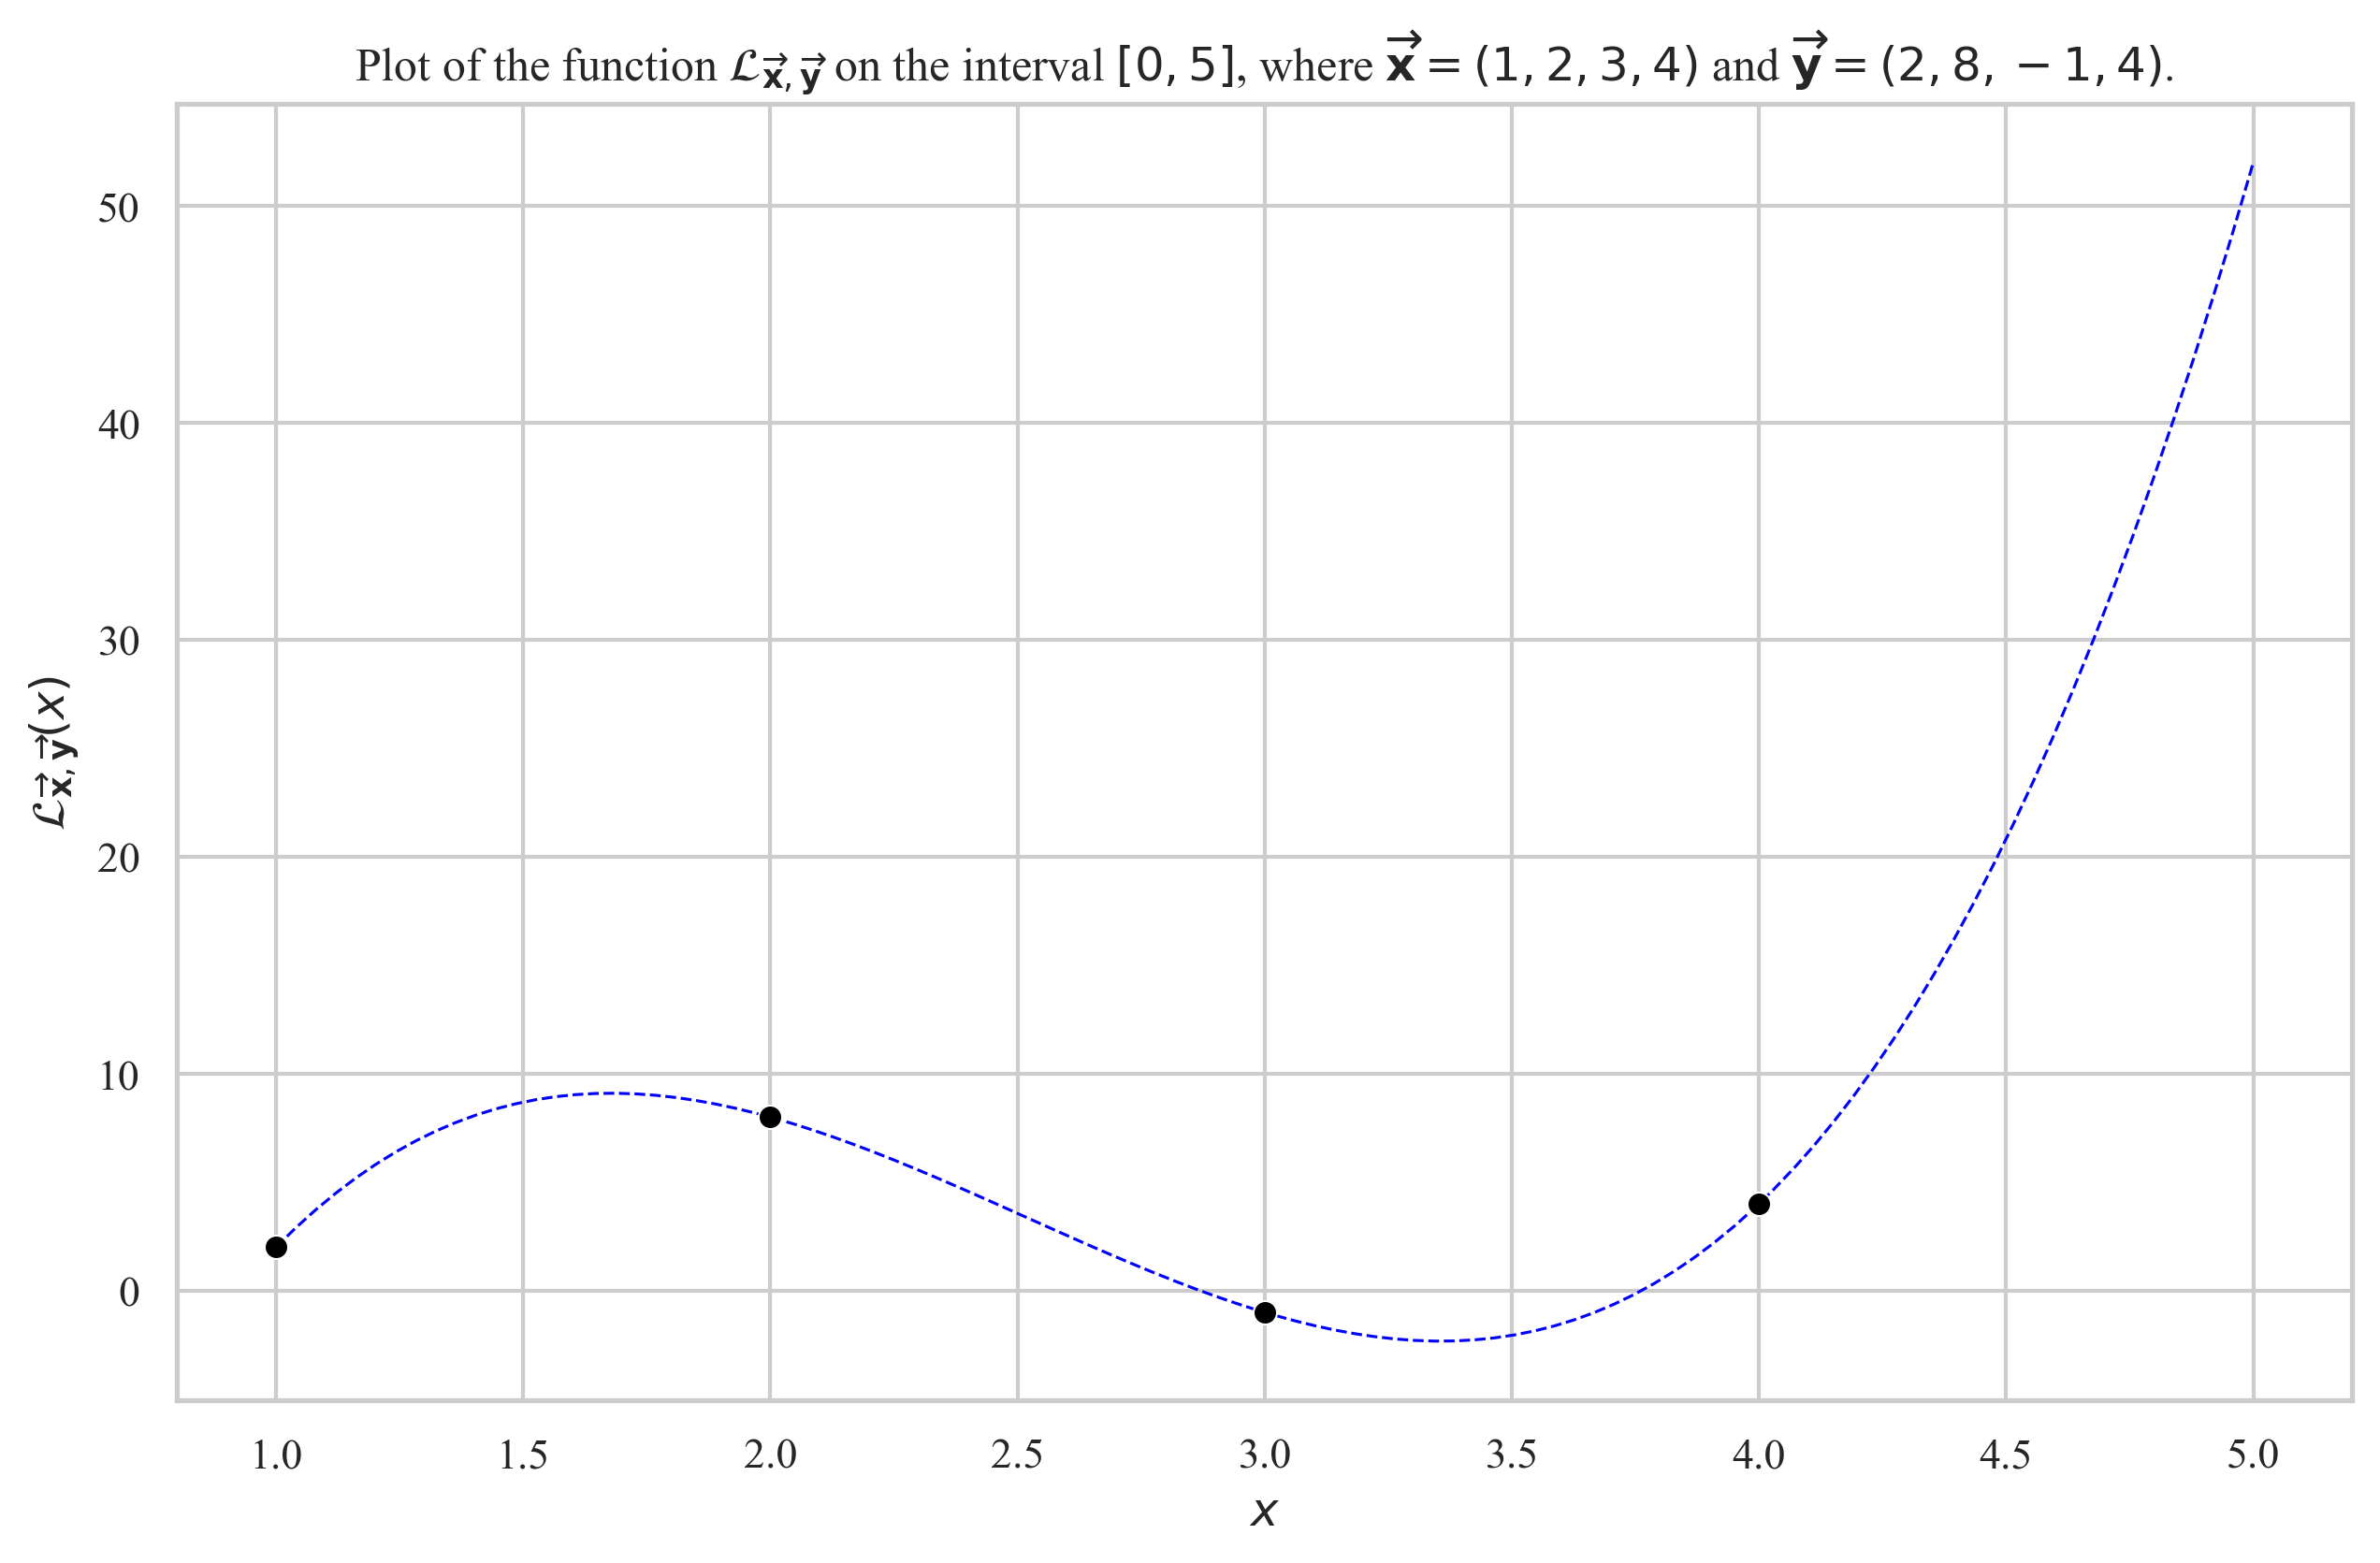

In [53]:
X = np.array([1, 2, 3, 4])
Y = np.array([2, 8, -1, 4])
L = np.vectorize(lagrange_polynomial(X, Y))
x = np.linspace(1, 5, 100)
y = L(x)
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
sns.scatterplot(x = X, y = Y, alpha = 1, color = "black", zorder = 10)
sns.lineplot(x = x, y = y, color = "blue", linewidth = 0.75, linestyle = "--").set(title = "Plot of the function $\mathcal{L}_{\overrightarrow{\mathbf{x}}, \overrightarrow{\mathbf{y}}}$ on the interval $[0, 5]$, where $\overrightarrow{\mathbf{x}} = (1,2,3,4)$ and $\overrightarrow{\mathbf{y}} = (2,8,-1,4)$.", xlabel = "$x$", ylabel = "$\mathcal{L}_{\overrightarrow{\mathbf{x}}, \overrightarrow{\mathbf{y}}}(x)$")
plt.show()

Although the points have been plotted as a scatterplot, the lineplot passes through all of them, as expected.

## **Credits**
- Wikipedia contributors, "[Lagrange polynomial](https://en.wikipedia.org/w/index.php?title=Lagrange_polynomial&oldid=1196845581)," Wikipedia, The Free Encyclopedia (accessed March 10, 2024).
- The original code is provided as-is in this project by Zakaria Zerrouki